In [2]:
import numpy as np
import pandas as pd
import scipy as sc
import re

## Day 11

In [3]:
file11 = open('day11_input', 'r') 
input11_lines = file11.readlines()

def number_of_neighbors(pos, people):
    y, x = pos
    neighbours_pos = [[y+1, x-1], [y+1, x], [y+1, x+1],
                      [y  , x-1],           [y,   x+1],
                      [y-1, x-1], [y-1, x], [y-1, x+1]]
    
    return sum([people[p[0],p[1]] for p in neighbours_pos])


def propegate(are_people, chair_positions):

    people_change = np.zeros(are_people.shape).astype(np.int)

    for pos in chair_positions:
        y,x = pos
        if are_people[y,x]:
            if number_of_neighbors(pos, are_people) > 3:
                    people_change[y,x] = -1    
        else:
            if number_of_neighbors(pos, are_people) == 0:
                people_change[y,x] = 1

    are_people += people_change
    
    return are_people

In [4]:
are_chairs = [] 
for line in input11_lines:
    string = line.replace('\n', '').replace('L','1').replace('.','0')
    are_chairs.append([0] + [int(s) for s in string] + [0])
    
boundary   = [[0]*len(are_chairs[0])]
are_chairs = boundary + are_chairs + boundary
    
are_chairs = np.array(are_chairs).astype(np.bool)
are_people = np.zeros(are_chairs.shape).astype(np.int)

chair_positions = np.array(np.where(are_chairs)).T

print(are_chairs.shape, are_people.shape)

(101, 94) (101, 94)


### Part A

In [5]:
tot_people_now = 1
tot_people_prev = 0
iteration = 0
while tot_people_now != tot_people_prev:
    print('\r' + str(iteration), end='')
    tot_people_prev = tot_people_now
    are_people = propegate(are_people, chair_positions)
    tot_people_now = are_people.sum()
    iteration += 1
    
answer11A = are_people.sum()
print('\n answer:', answer11A)

86
 answer: 2359


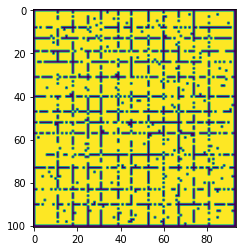

In [20]:
import matplotlib.pyplot as plt
#import matplotlib.image as mpimg
#img = mpimg.imread('your_image.png')
imgplot = plt.imshow(are_chairs)
plt.show()

### Part B

In [83]:
def get_nearest_chairs(pos, are_chairs):
    """ Function to find the nearest chairs in all 8 directions at position pos. """
    
    y_max, x_max = are_chairs.shape
    
    directions = [[ 1, -1], [ 1, 0], [ 1, 1], 
                  [ 0, -1],          [ 0, 1],
                  [-1, -1], [-1, 0], [-1, 1]]
    directions = np.array(directions)
    
    nearest_chairs = []
    
    for direction in directions:
        
        step = 1        
        y, x = (pos + step*direction)
        while (x > 0 and x < x_max) and (y > 0 and y < y_max):
            
            #print(y, y_max, y < y_max, x, x_max, x < x_max)
            if are_chairs[y,x]:
                nearest_chairs.append([y,x])
                break
            
            step += 1
            y, x = (pos + step*direction)
            
    return nearest_chairs


def propegate_partB(are_people, chair_positions, chair_neighbours):
    """ Propegate the simulation of part B one step. """

    people_change = np.zeros(are_people.shape).astype(np.int)

    for pos, neighbors in zip(chair_positions, chair_neighbours):
        
        y,x = pos
        neighbor_number = sum([are_people[y2, x2] for y2, x2 in neighbors])
        if are_people[y,x]:
            if neighbor_number > 4:
                people_change[y,x] = -1    
        else:
            if neighbor_number == 0:
                people_change[y,x] = 1

    are_people += people_change
    
    return are_people

In [84]:
chairs_nearest_neighbours = []
for idx, pos in enumerate(chair_positions):
    print('\r' + str(idx) + ' (' + str(len(chair_positions)) + ')', end='')
    chairs_nearest_neighbours.append(get_nearest_chairs(pos, are_chairs))

7528 (7529)

In [92]:
are_people = np.zeros(are_chairs.shape).astype(np.int)

tot_people_now = 1
tot_people_prev = 0
iteration = 0
while tot_people_now != tot_people_prev:
    
    print('\r 1 - ' + str(iteration) + ', tot people:', str(tot_people_now), end='')
    tot_people_prev = tot_people_now
    are_people = propegate_partB(are_people, chair_positions, chairs_nearest_neighbours)
    tot_people_now = are_people.sum()
    iteration += 1
    #print('\r 2 - ' + str(iteration) + ', tot people:', str(tot_people_now), end='')
    
answer11B = are_people.sum()
print('\n answer:', answer11B)

 1 - 86, tot people: 2131
 answer: 2131
